<a href="https://colab.research.google.com/github/rockerritesh/easyOCR_Nepali/blob/main/Nepali_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nepali OCR detector.

## importing Module

In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 9.3 kB/s 


In [ ]:

import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

## Loading pre trained model.

'ne' for Nepali and 'en' for english and simillary for other

In [ ]:
reader = easyocr.Reader(['ne']) #'ne' for Nepali and 'en' for english and simillary for other

## Normal image to Scaned image

In [ ]:
def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def highPassFilter(img,kSize):
    if not kSize%2:
        kSize +=1
    kernel = np.ones((kSize,kSize),np.float32)/(kSize*kSize)
    filtered = cv2.filter2D(img,-1,kernel)
    filtered = img.astype('float32') - filtered.astype('float32')
    filtered = filtered + 127*np.ones(img.shape, np.uint8)
    filtered = filtered.astype('uint8')
    return filtered

def blackPointSelect(img, blackPoint):
    img = img.astype('int32')
    img = map(img, blackPoint, 255, 0, 255)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_TOZERO)
    img = img.astype('uint8')
    return img

def whitePointSelect(img,whitePoint):
    _,img = cv2.threshold(img, whitePoint, 255, cv2.THRESH_TRUNC)
    img = img.astype('int32')
    img = map(img, 0, whitePoint, 0, 255)
    img = img.astype('uint8')
    return img

def blackAndWhite(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    (l,a,b) = cv2.split(lab)
    img = cv2.add( cv2.subtract(l,b), cv2.subtract(l,a) )
    return img
def scan_effect(img):
    
    blackPoint = 66
    whitePoint = 130
    image = highPassFilter(img,kSize = 51)
    image_white = whitePointSelect(image, whitePoint)
    img_black = blackPointSelect(image_white, blackPoint)
    image=blackPointSelect(img,blackPoint)
    white = whitePointSelect(image,whitePoint)
    img_black = blackAndWhite(white)
    return img_black



> Enter the location of image file

In [ ]:
loc="2.jpg"

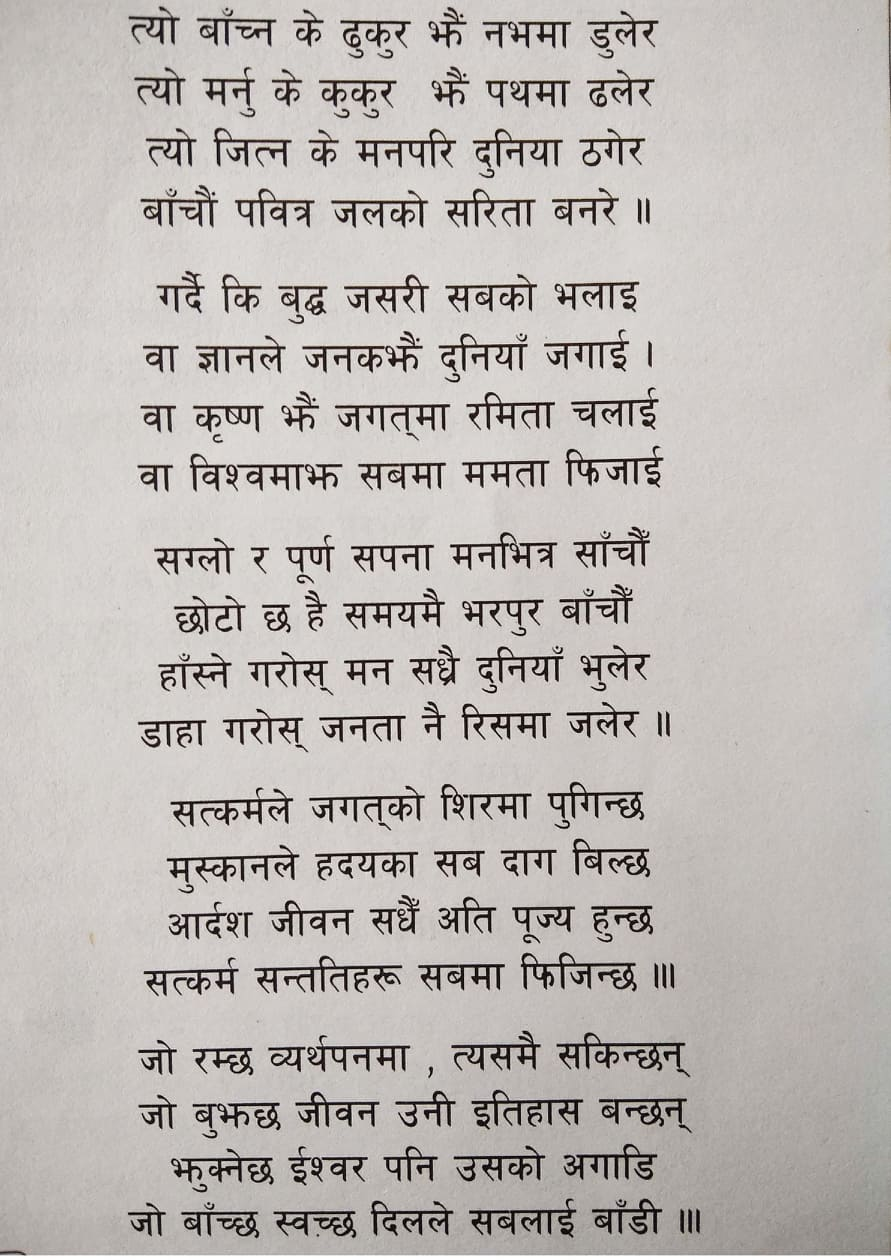

In [ ]:

Image(loc)

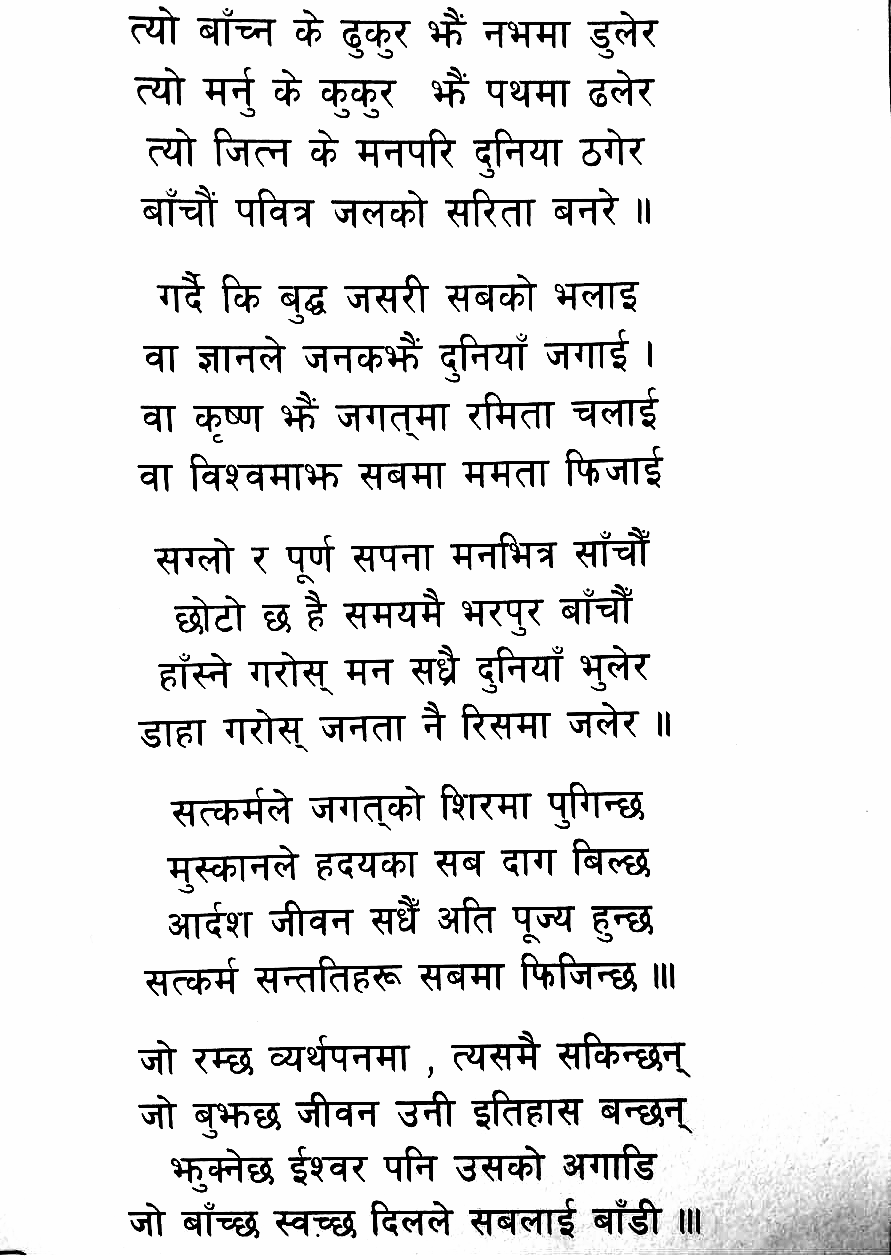

True

In [ ]:
img = cv2.imread(loc)
image = scan_effect(img)
#from google.colab.patches import cv2_imshow
#cv2_imshow(image)
filename = 'scanned.jpg'
cv2.imwrite(filename, image)

## Loading Image

In [ ]:
path=filename

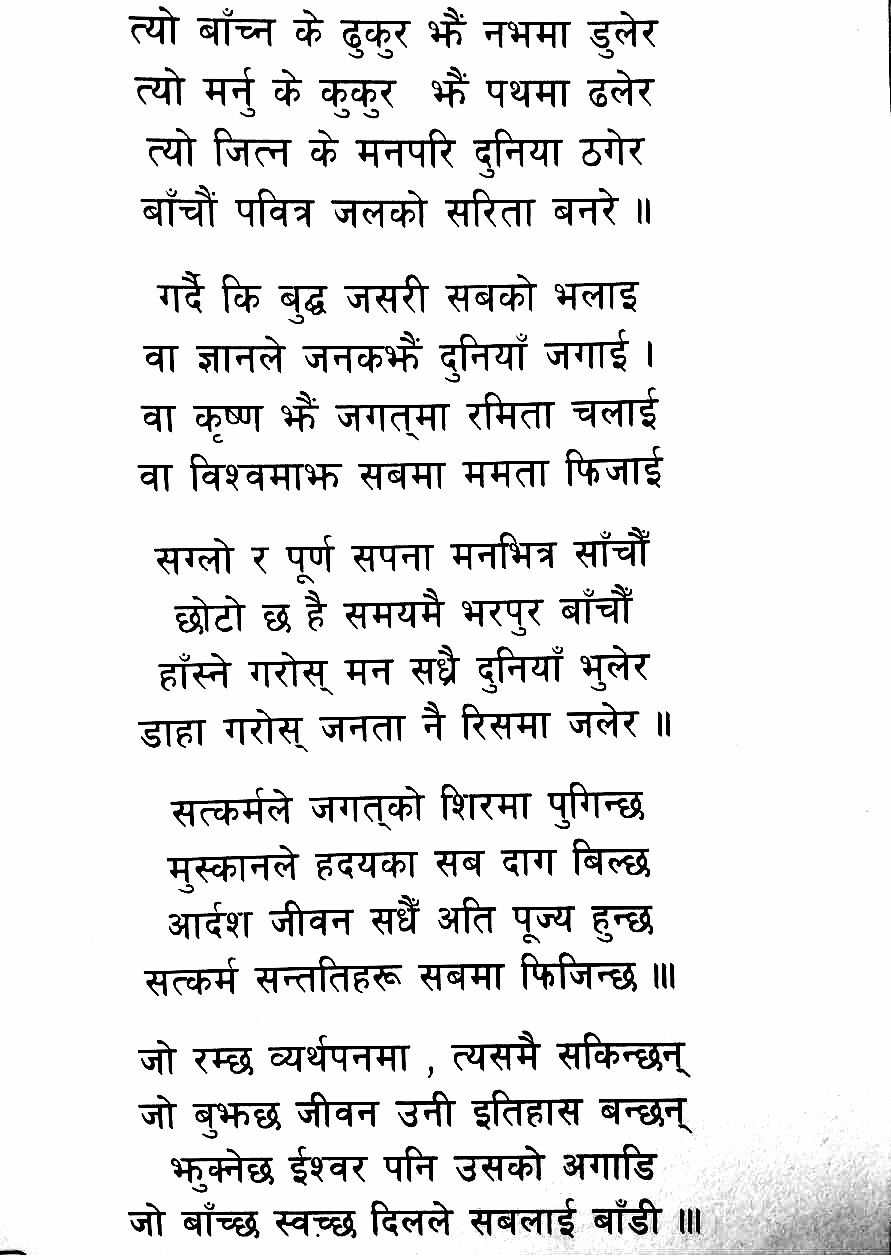

In [ ]:

Image(path)

## Detecting character from image

In [ ]:
output = reader.readtext(path)

## Output

In [ ]:
output

[([[123, 1], [667, 1], [667, 67], [123, 67]],
  'त्या बांच्न के ढुकुर झैं नभमा डुलेर',
  0.3381714640956552),
 ([[129, 59], [409, 59], [409, 128], [129, 128]],
  'त्यो मर्नु के कुकुर',
  0.6069389645579002),
 ([[424, 60], [663, 60], [663, 116], [424, 116]],
  'झैं पथमा ढलेर',
  0.678598319341647),
 ([[141, 121], [655, 121], [655, 185], [141, 185]],
  'त्याे जित्न के मनपरि दुनिया ठगेर',
  0.466542709532707),
 ([[134, 180], [656, 180], [656, 236], [134, 236]],
  'बांचौं पवित्र जलको सरिता बनरे ।',
  0.33612146115405894),
 ([[151, 267], [647, 267], [647, 329], [151, 329]],
  'गर्दै कि बुद्घ जसरी सबको भलाइ',
  0.5689838746811848),
 ([[138, 329], [294, 329], [294, 380], [138, 380]],
  'वा ज्ञानले',
  0.5712557530269956),
 ([[428, 325], [639, 325], [639, 392], [428, 392]],
  'दुनियां जिगाई',
  0.5282788595967648),
 ([[135, 383], [667, 383], [667, 445], [135, 445]],
  'वा कृष्ण झैं जगत्मा रमिता चलाई',
  0.6665105167823989),
 ([[136, 462], [176, 462], [176, 494], [136, 494]], 'वा', 0.4105296362

## Total detection

In [ ]:
print(f'Total number of detection',len(output))

Total number of detection 27


## Previewing Output

त्या बांच्न के ढुकुर झैं नभमा डुलेर
त्यो मर्नु के कुकुर
झैं पथमा ढलेर
त्याे जित्न के मनपरि दुनिया ठगेर
बांचौं पवित्र जलको सरिता बनरे ।
गर्दै कि बुद्घ जसरी सबको भलाइ
वा ज्ञानले
दुनियां जिगाई
वा कृष्ण झैं जगत्मा रमिता चलाई
वा
विश्वमाझ सबमा ममता फिजाई
सग्लो र
पूर्ण सपना मनभित्र सांचौं
छोटो छ है समयमै भरपुर बांचौं
हांस्ने गरोस् मन सध्रै दुनियां भुलेर
डाहा गरोस् जनता नै रिसमा जलेर ।
सत्कर्मले जगत्को शिरमा पुगिन्छ
हदयका सब दाग बिल्छ
आर्दश जीवन सधैं अति पूज्य हुन्छ
सत्कर्म सन्ततिहरू सबमा फिजिन्छ ।।।
जो रम्छ व्यर्थपनमा
त्यसमै सकिन्छन्
जो बुझछ जीवन उनी इतिहास बन्छन्
झक्नेछ ईश्वर पनि उसको अगाडि
जो बांच्छ स्वच्छ दिलले सबलाई बांडी ।०
जनकभैं
मुस्कानले


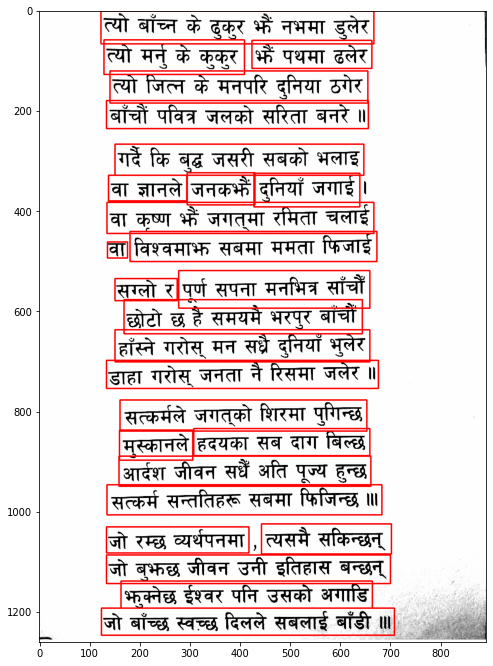

In [ ]:
image = cv2.imread(path)
for i in range(len(output)):
  cord = output[i][0]
  x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
  x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
  cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
  print(output[i][1])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  